In [2]:
pip install pandas

In [3]:
pip install numpy

In [4]:
import pandas as pd
import numpy as np

In [8]:
#Upload Data and read it
dataset=pd.read_csv('/content/Dataset/noshowappointments-kagglev2-may-2016.csv')

In [10]:
print(dataset)


           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

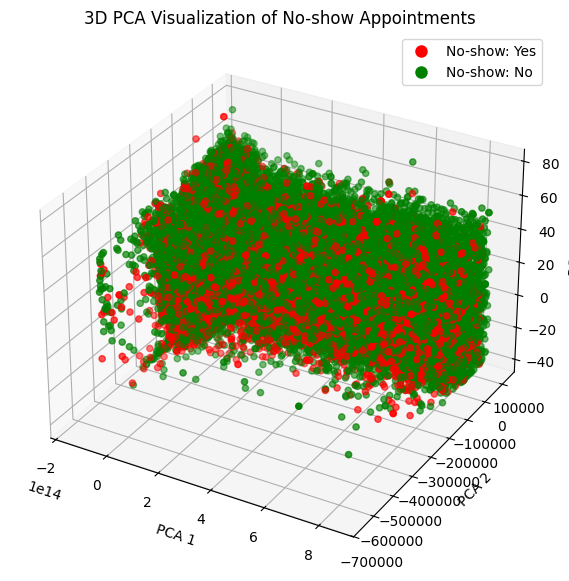

In [14]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Selecting only numerical columns for PCA (excluding the target column)
numerical_data = dataset.select_dtypes(include=[np.number])

# Drop rows with missing values
numerical_data = numerical_data.dropna()

# Reduce to 3 principal components
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(numerical_data)

# Get the last column (assumed to be the "No-show" column)
labels = dataset['No-show'].iloc[numerical_data.index]  # Align indices

# Assign colors based on "No-show" values
color_map = {'Yes': 'red', 'No': 'green'}
colors = labels.map(color_map)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on the No-show column
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=colors, marker='o')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D PCA Visualization of No-show Appointments')

# Add legend for better understanding
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No-show: Yes'),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='No-show: No')]

ax.legend(handles=legend_labels)

plt.show()
